# Student Stress Factors
---

> Konstantinos Mpouros <br>
> Github: https://github.com/konstantinosmpouros <br>
> Year: 2023

## 1. About the project
---

**Project Overview:**
This project aims to enhance my skills in analyzing and presenting data using Jupyter Notebook.

**Dataset Description:**
The dataset comprises approximately 20 features that significantly contribute to assessing the stress levels of students. These features are selected based on five major factors: Psychological, Physiological, Social, Environmental, and Academic. The chosen features include:

- **Psychological Factors:**
  - 'anxiety_level'
  - 'self_esteem'
  - 'mental_health_history'
  - 'depression'

- **Physiological Factors:**
  - 'headache'
  - 'blood_pressure'
  - 'sleep_quality'
  - 'breathing_problem'

- **Environmental Factors:**
  - 'noise_level'
  - 'living_conditions'
  - 'safety'
  - 'basic_needs'

- **Academic Factors:**
  - 'academic_performance'
  - 'study_load'
  - 'teacher_student_relationship'
  - 'future_career_concerns'

- **Social Factor:**
  - 'social_support'
  - 'peer_pressure'
  - 'extracurricular_activities'
  - 'bullying'


This diverse set of features allows for a comprehensive analysis of student stress, covering aspects ranging from psychological well-being to academic and social factors. The goal is to gain valuable insights into the various dimensions that contribute to student stress levels.

* You can found the dataset in this [link](https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis)

## 2. Data loading and Libraries
---

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_rank
from optuna.visualization import plot_timeline

# Data Normalization and Spliting
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Hyperparameter tuning
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import optuna

# Neural Networks (Tensorflow)
import tensorflow as tf

# Machine learning models
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
student_stress = pd.read_csv('Datasets/StressLevelDataset.csv')
student_stress.head()

anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  safety  basic_needs  academic_performance  study_load  \
0                  3       3            2                     3           2   
1                  1       2            2                     1           4   
2                  2       3            2                     2           3   
3                  2       2            2                     2           4   
4                  2       4            3                     4           3   

   teacher_student_relationship  future_career_concerns  social_support  \
0                             3                       3               2   
1                             1                       5               1   
2                             3                       2               2   
3                             1                       4               1   
4                             1                       2               1   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0              3                           3         2             1  
1              4                           5         5             2  
2              3                           2         2             1  
3              4                           4         5             2  
4              5                           0         5             1

In [4]:
student_stress.shape

(1100, 21)

## 3. EDA and Data Understanding
---

In [5]:
student_stress.describe()

anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000           0.000000   
25%       1.000000        1.000000       1.000000           2.000000   
50%       3.000000        2.000000       2.500000           3.000000   
75%       3.000000        3.000000       4.000000           4.000000   
max       5.000000        3.000000       5.000000           5.000000   

       noise_level  living_conditions       safety  basic_needs  \
count  1100.000000        1100.000000  1100.000000  1100.000000   
mean      2.649091           2.518182     2.737273     2.772727   
std       1.328127           1.119208     1.406171     1.433761   
min       0.000000           0.000000     0.000000     0.000000   
25%       2.000000           2.000000     2.000000     2.000000   
50%       3.000000           2.000000     2.000000     3.000000   
75%       3.000000           3.000000     4.000000     4.000000   
max       5.000000           5.000000     5.000000     5.000000   

       academic_performance   study_load  teacher_student_relationship  \
count           1100.000000  1100.000000                   1100.000000   
mean               2.772727     2.621818                      2.648182   
std                1.414594     1.315781                      1.384579   
min                0.000000     0.000000                      0.000000   
25%                2.000000     2.000000                      2.000000   
50%                2.000000     2.000000                      2.000000   
75%                4.000000     3.000000                      4.000000   
max                5.000000     5.000000                      5.000000   

       future_career_concerns  social_support  peer_pressure  \
count             1100.000000     1100.000000    1100.000000   
mean                 2.649091        1.881818       2.734545   
std                  1.529375        1.047826       1.425265   
min                  0.000000        0.000000       0.000000   
25%                  1.000000        1.000000       2.000000   
50%                  2.000000        2.000000       2.000000   
75%                  4.000000        3.000000       4.000000   
max                  5.000000        3.000000       5.000000   

       extracurricular_activities     bullying  stress_level  
count                 1100.000000  1100.000000   1100.000000  
mean                     2.767273     2.617273      0.996364  
std                      1.417562     1.530958      0.821673  
min                      0.000000     0.000000      0.000000  
25%                      2.000000     1.000000      0.000000  
50%                      2.500000     3.000000      1.000000  
75%                      4.000000     4.000000      2.000000  
max                      5.000000     5.000000      2.000000

In [6]:
student_stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [7]:
student_stress.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

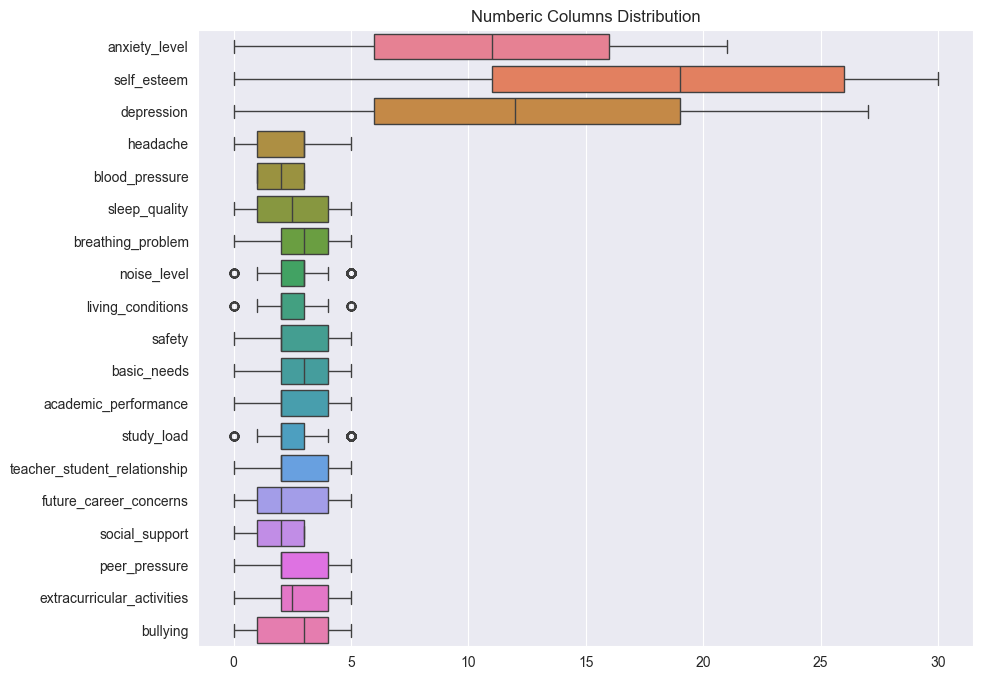

In [8]:
plt.figure(figsize=(10,8))
sns.boxplot(student_stress.drop(['mental_health_history', 'stress_level'], axis=1), orient='h')
plt.title('Numberic Columns Distribution')
plt.savefig('Graphs/numeric_col_distribution.png')
plt.show()

<Figure size 1200x700 with 0 Axes>

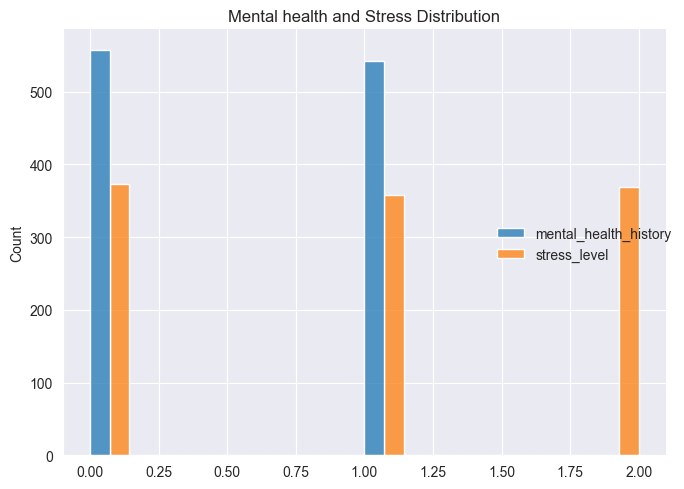

In [9]:
plt.figure(figsize=(12,7))

sns.displot(student_stress[['mental_health_history', 'stress_level']], multiple='dodge', legend=True)

plt.title('Mental health and Stress Distribution')
plt.tight_layout()

plt.savefig('Graphs/binary_col_distribution.png')
plt.show()

In [10]:
stress_level_counts = student_stress[['mental_health_history', 'stress_level']] \
                                                                .value_counts() \
                                                                .sort_index() \
                                                                .unstack(0)
stress_level_counts

mental_health_history    0    1
stress_level                   
0                      335   38
1                      183  175
2                       40  329

<Figure size 1300x700 with 0 Axes>

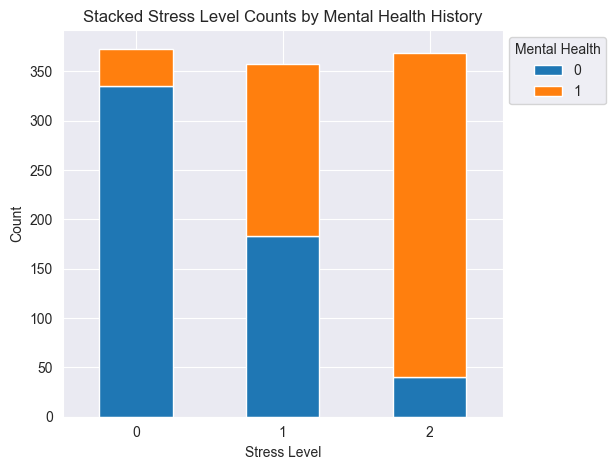

In [11]:
plt.figure(figsize=(13,7))

stress_level_counts.plot(kind='bar', stacked=True)

plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Stacked Stress Level Counts by Mental Health History')
plt.xticks(rotation=0)
plt.legend(title='Mental Health', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.savefig('Graphs/Stress_level_by_mental_health.png')
plt.show()

In [12]:
scaler = MinMaxScaler(feature_range=(0, 5))
student_stress_scaled = pd.DataFrame(scaler.fit_transform(student_stress.values))
stress_categ = student_stress_scaled.groupby(20).agg('mean')
stress_categ

0         1         2         3         4         5         6   \
20                                                                          
0.0  1.293247  4.208668  0.509383  1.113593  1.313673  2.989276  4.126005   
2.5  2.721468  3.210428  2.444134  2.198945  2.460894  0.810056  2.530726   
5.0  3.905020  1.463415  4.457995  3.672087  3.761518  5.000000  1.303523   

           7         8         9         10        11        12        13  \
20                                                                          
0.0  1.697051  1.648794  3.313673  4.099196  4.144772  4.142091  1.654155   
2.5  2.927374  2.511173  2.502793  2.416201  2.477654  2.491620  2.533520   
5.0  3.653117  3.794038  1.728997  1.672087  1.672087  1.661247  3.685637   

           14        15        16        17        18        19  
20                                                               
0.0  3.927614  1.335121  4.235925  1.675603  1.715818  1.254692  
2.5  2.357542  2.522346  3.631285  2.458101  2.480447  2.555866  
5.0  1.636856  4.100271  1.544715  4.073171  4.108401  4.054201

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(27, 10), subplot_kw=dict(polar=True))

count = 0
for i in stress_categ.index.values:
    data = stress_categ.loc[i]
    
    values = data.values.copy().tolist()
    categories = student_stress.columns[:-1].copy()
    
    # Number of categories
    num_categories = len(categories)
    
    # Calculate angle for each category
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

    # Close the plot
    values += values[:1]
    angles += angles[:1]

    # Plot
    axs[count].plot(angles, values, marker='o', linestyle='solid', linewidth=2)

    # Fill the area under the plot
    axs[count].fill(angles, values, alpha=0.4)

    # Adding labels to each axis
    axs[count].set_thetagrids(np.degrees(angles[:-1]), labels=categories)

    # Enter the title according to the category
    if count == 0:
        axs[count].set_title('Stress level 1', fontsize=17)
    elif count == 1:
        axs[count].set_title('Stress level 2', fontsize=17)
    else:
        axs[count].set_title('Stress level 3', fontsize=17)
    count += 1
    
# Store the plot
plot = plt.gcf()
plot.savefig('Graphs/stress_level_characteristics.png')
plt.close()

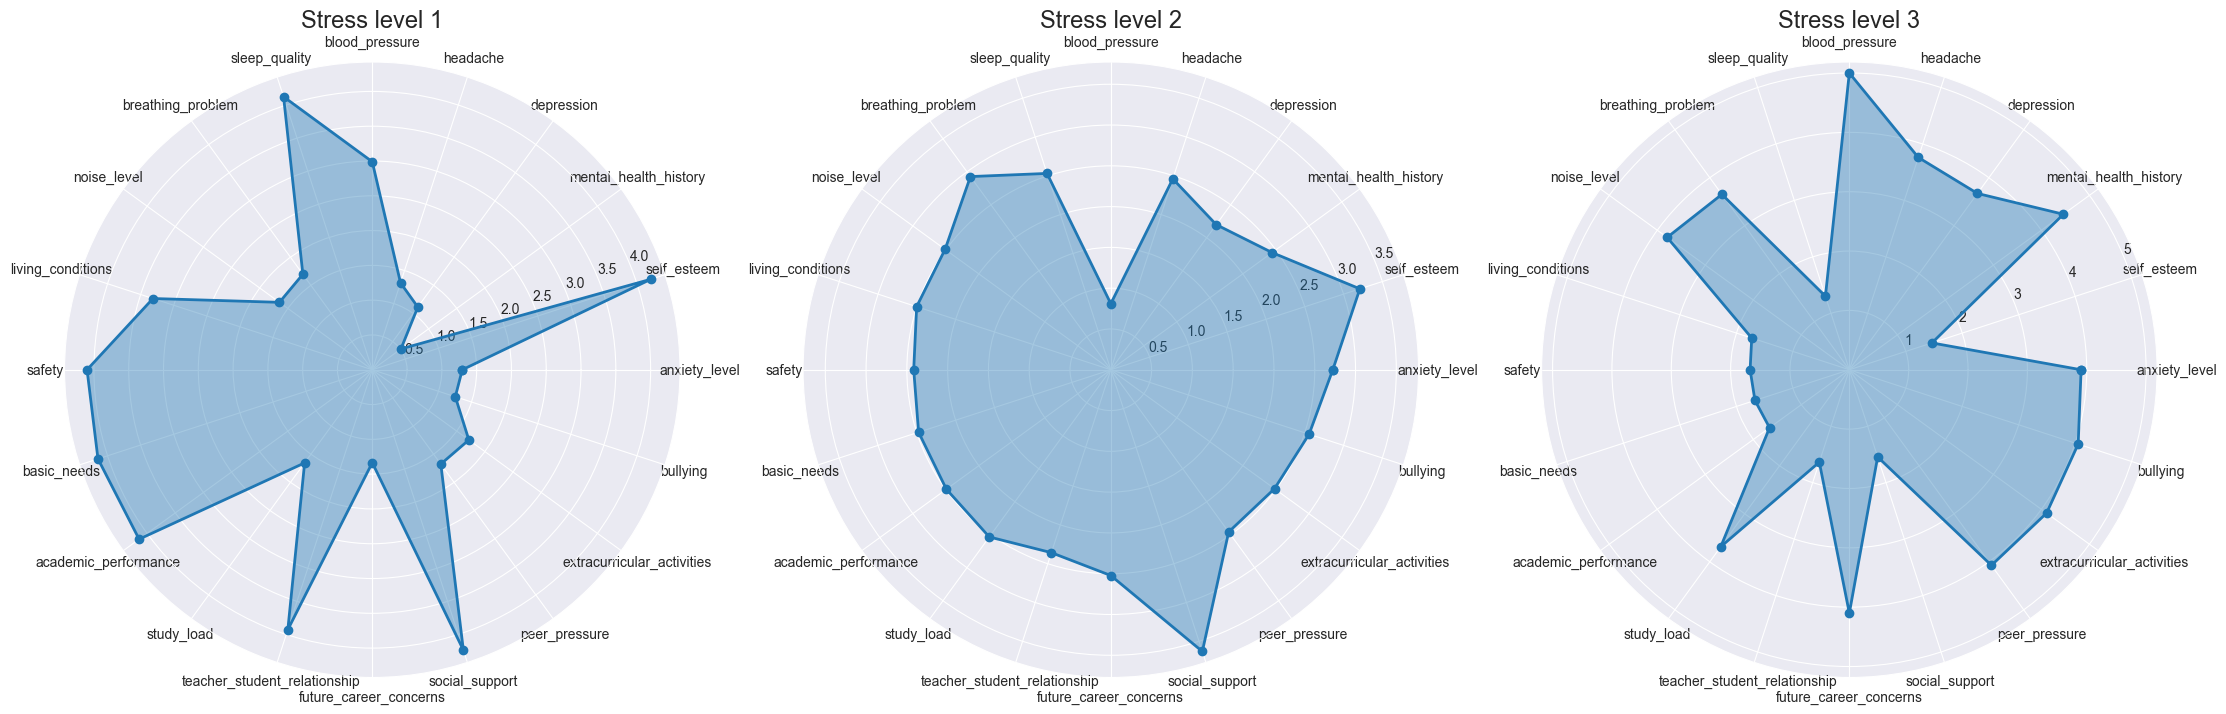

In [14]:
plot

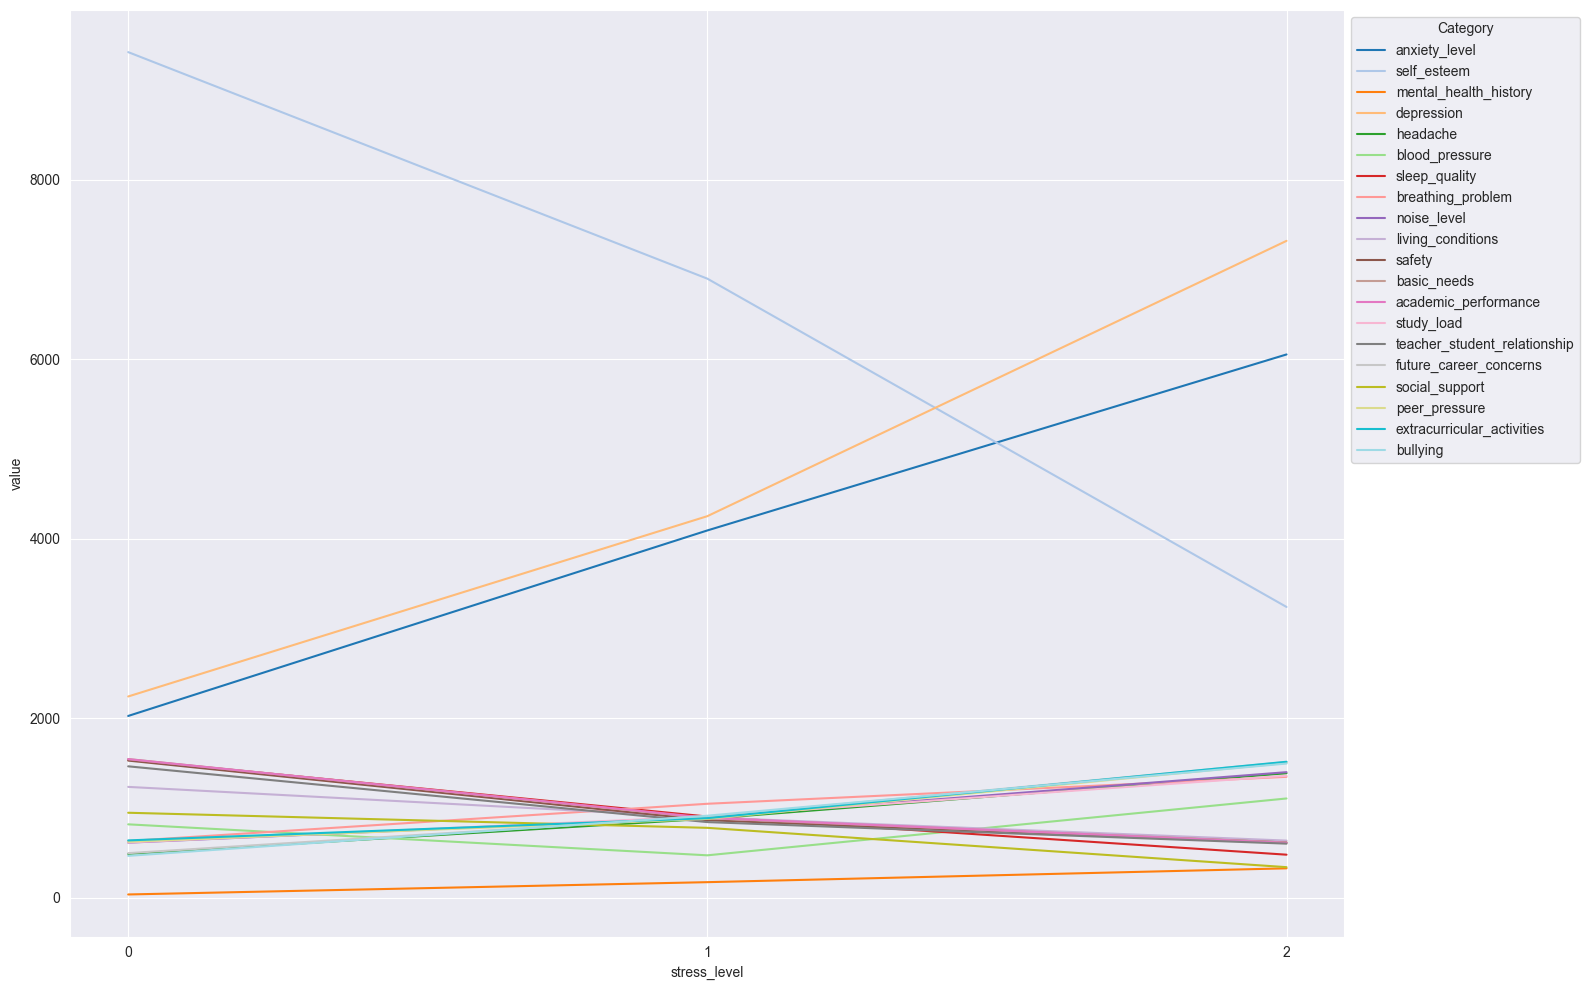

In [15]:
# Group and sum the data once
grouped_data = student_stress.groupby('stress_level').sum()

# Reshape the data to long format
long_format_data = grouped_data.reset_index().melt(id_vars='stress_level')

# Get the colormap
cmap = plt.get_cmap('tab20')

# Create the figure
plt.figure(figsize=(16, 10))

# Plot each category (replace 'variable' with your actual category column name if different)
for i, col in enumerate(grouped_data.columns):
    sns.lineplot(data=long_format_data[long_format_data['variable'] == col],
                 x='stress_level',
                 y='value',
                 label=col,
                 color=cmap(i % 20))  # Using modulo 20 to cycle through colors

# Customize the plot
plt.xticks([0, 1, 2])
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.savefig('Graphs/Var_behave_by_stress_lvl.png')
plt.show()

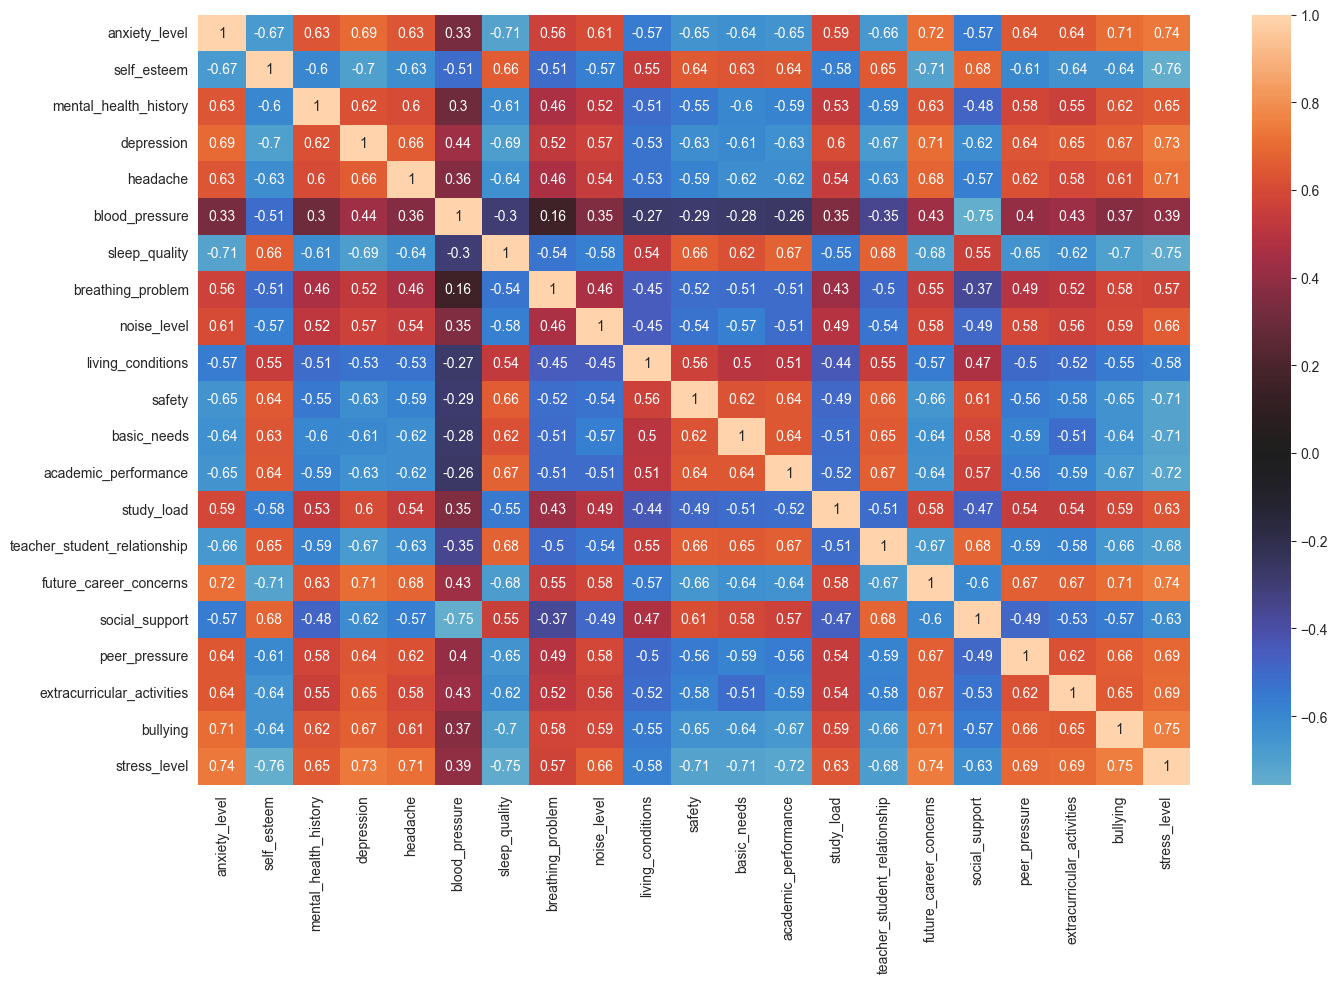

In [16]:
plt.figure(figsize=(16, 10))
sns.heatmap(student_stress.corr(), annot=True, center=0)
plt.savefig('Graphs/correlations.png')
plt.show()

## 4. Machine learning modeling
---

In [17]:
X = student_stress.iloc[:, :-1].drop('blood_pressure', axis=1)
y = student_stress['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33, shuffle=True)

### Stochastic gradient descent

In [18]:
sgd = SGDClassifier(random_state=33)
sgd.fit(X_train, y_train)

SGDClassifier(random_state=33)

In [19]:
sgd.score(X_test, y_test)

0.9090909090909091

In [20]:
params = {
    'alpha': [.1, .3, .5, .75, 1, 2, 5, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': np.linspace(.0001,0.99, 10),
    'epsilon': np.linspace(0, 10, 20),
    'tol': [.001, .01, .1],
    'max_iter': [1000],
    'warm_start': [True, False]
}

In [21]:
sgd_grid_search = GridSearchCV(SGDClassifier(random_state=33), params, cv=5, n_jobs=-1)
sgd_pipeline = make_pipeline(StandardScaler(), sgd_grid_search)
sgd_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SGDClassifier(random_state=33),
                              n_jobs=-1,
                              param_grid={'alpha': [0.1, 0.3, 0.5, 0.75, 1, 2,
                                                    5, 10],
                                          'epsilon': array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
                                          'l1_ratio': array([1.00000000e-04, 1.10088889e-01, 2.20077778e-01, 3.30066667e-01,
       4.40055556e-01, 5.50044444e-01, 6.60033333e-01, 7.70022222e-01,
       8.80011111e-01, 9.90000000e-01]),
                                          'max_iter': [1000],
                                          'penalty': ['l1', 'l2', 'elasticnet'],
                                          'tol': [0.001, 0.01, 0.1],
                                          'warm_start': [True, False]}))])

In [22]:
sgd_grid_search.best_params_

{'alpha': 0.1,
 'epsilon': 0.0,
 'l1_ratio': 0.0001,
 'max_iter': 1000,
 'penalty': 'l2',
 'tol': 0.01,
 'warm_start': True}

In [135]:
sgd_grid_search.best_estimator_, sgd_grid_search.best_score_

(SGDClassifier(alpha=0.1, epsilon=0.0, l1_ratio=0.0001, random_state=33,
               tol=0.01, warm_start=True),
 0.865909090909091)

In [136]:
sgd_pipeline.score(X_test, y_test)

0.9136363636363637

In [137]:
print(classification_report(y_test, sgd_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        82
           1       0.88      0.90      0.89        68
           2       0.91      0.97      0.94        70

    accuracy                           0.91       220
   macro avg       0.91      0.92      0.91       220
weighted avg       0.91      0.91      0.91       220



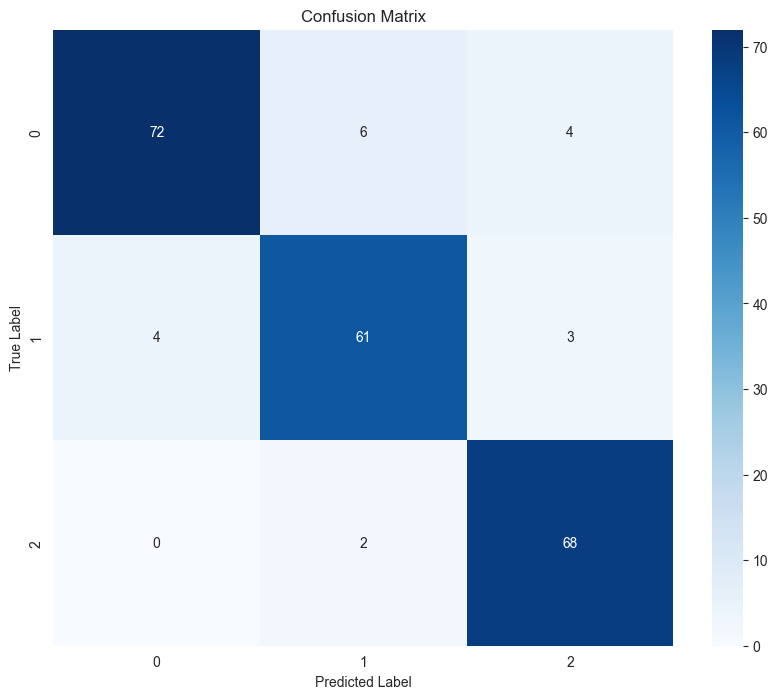

In [138]:
plt.figure(figsize=(10, 8))

cm = np.round(confusion_matrix(y_test, sgd_pipeline.predict(X_test)), 0)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.savefig('Graphs/sgd_pipeline_predictions.png')    
plt.show()

In [139]:
def objective_sgd(trial):

    scaler = trial.suggest_categorical('scaler', ['StandardScaler', 'MinMaxScaler'])
    if scaler == 'StandardScaler':
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
    
    alpha = trial.suggest_float('alpha', 0.01, 1)
    epsilon = trial.suggest_float('epsilon', 0.01, 1)
    l1_ratio = trial.suggest_float('l1_ratio', 0.01, 1)
    penalty = trial.suggest_categorical('penalty', [None, 'elasticnet', 'l1', 'l2'])
    warm_start = trial.suggest_categorical('warm_start', [True, False])
    
    sgd = SGDClassifier(alpha=alpha,
                         epsilon=epsilon,
                         l1_ratio=l1_ratio,
                         penalty=penalty,
                         warm_start=warm_start,
                         max_iter=1000,
                         random_state=33
                         )

    pipeline = make_pipeline(scaler, sgd)

    score = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', n_jobs=-1)
    return score.mean()

In [140]:
study_sgd = optuna.create_study(direction="maximize")
study_sgd.optimize(objective_sgd, n_trials=200, n_jobs=-1)

[I 2024-02-10 01:41:45,745] A new study created in memory with name: no-name-f00efe76-fe30-447e-8b06-6ef9d8d16ce2
[I 2024-02-10 01:41:45,909] Trial 5 finished with value: 0.33295454545454545 and parameters: {'scaler': 'StandardScaler', 'alpha': 0.5065186982986646, 'epsilon': 0.1642343613546, 'l1_ratio': 0.9120506059679383, 'penalty': 'elasticnet', 'warm_start': True}. Best is trial 5 with value: 0.33295454545454545.
[I 2024-02-10 01:41:45,941] Trial 3 finished with value: 0.8681818181818182 and parameters: {'scaler': 'MinMaxScaler', 'alpha': 0.06270326119005067, 'epsilon': 0.3873313001687018, 'l1_ratio': 0.7003968821315126, 'penalty': None, 'warm_start': False}. Best is trial 3 with value: 0.8681818181818182.
[I 2024-02-10 01:41:45,943] Trial 6 finished with value: 0.32954545454545453 and parameters: {'scaler': 'StandardScaler', 'alpha': 0.6855871369366324, 'epsilon': 0.1831488732069433, 'l1_ratio': 0.08150325086041288, 'penalty': 'l1', 'warm_start': False}. Best is trial 3 with value:

In [141]:
print('Number of finished trials: ', len(study_sgd.trials))
print('Best trial:')
trial = study_sgd.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

Number of finished trials:  200
Best trial:
Value:  0.875
Params: 
    scaler: MinMaxScaler
    alpha: 0.1790397690243783
    epsilon: 0.42771338006441595
    l1_ratio: 0.01685115928622183
    penalty: None
    warm_start: False


In [142]:
trials_df = study_sgd.trials_dataframe()
trials_df.sort_values(by='value', ascending=False).head()

number  value             datetime_start          datetime_complete  \
100     100  0.875 2024-02-10 01:41:47.812907 2024-02-10 01:41:48.188934   
31       31  0.875 2024-02-10 01:41:46.181917 2024-02-10 01:41:46.432919   
105     105  0.875 2024-02-10 01:41:47.934907 2024-02-10 01:41:48.254932   
98       98  0.875 2024-02-10 01:41:47.763906 2024-02-10 01:41:48.123932   
96       96  0.875 2024-02-10 01:41:47.715909 2024-02-10 01:41:48.107936   

                  duration  params_alpha  params_epsilon  params_l1_ratio  \
100 0 days 00:00:00.376027      0.185191        0.335039         0.040445   
31  0 days 00:00:00.251002      0.179040        0.427713         0.016851   
105 0 days 00:00:00.320025      0.156811        0.348445         0.039036   
98  0 days 00:00:00.360026      0.181255        0.343275         0.042960   
96  0 days 00:00:00.392027      0.181604        0.329322         0.179837   

    params_penalty params_scaler  params_warm_start     state  
100           None  MinMaxScaler               True  COMPLETE  
31            None  MinMaxScaler              False  COMPLETE  
105           None  MinMaxScaler               True  COMPLETE  
98            None  MinMaxScaler               True  COMPLETE  
96            None  MinMaxScaler               True  COMPLETE

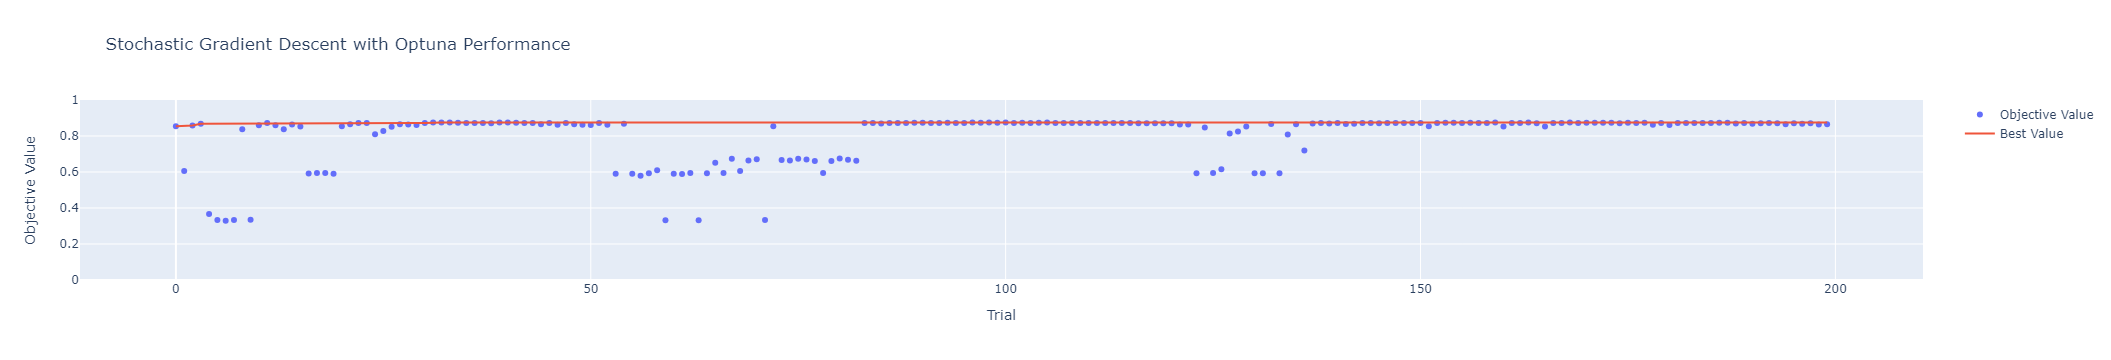

In [143]:
fig = plot_optimization_history(study_sgd)

fig.update_layout(yaxis_range=[0, 1], title="Stochastic Gradient Descent with Optuna Performance")
fig.write_html('Graphs/SGD_optuna_performance1.html')
fig.show()

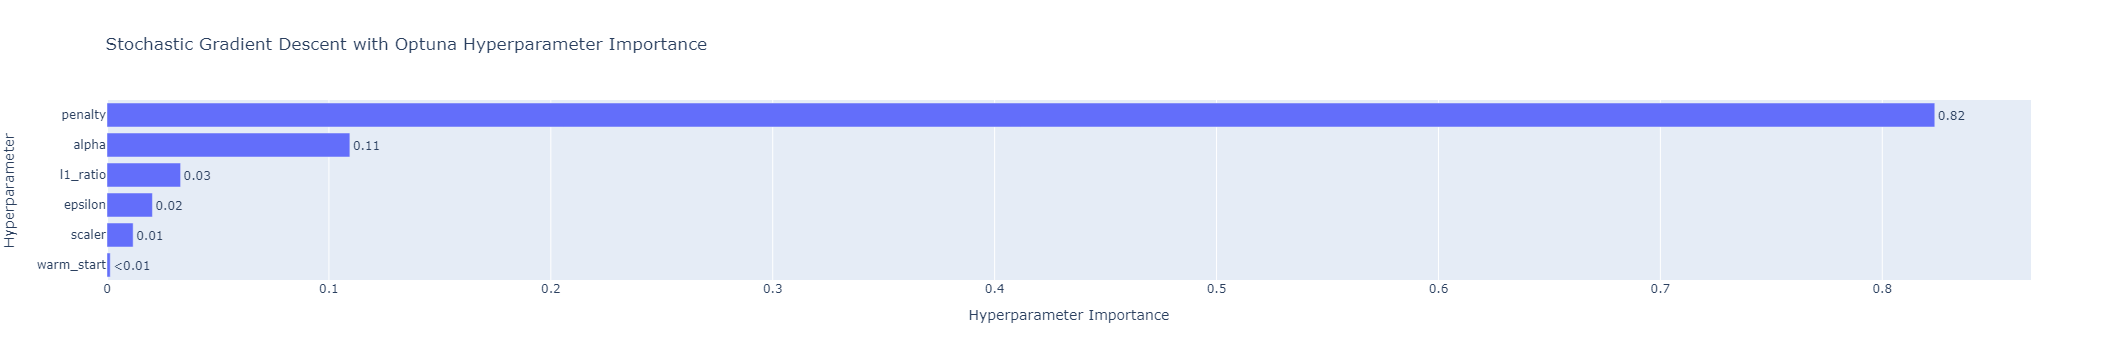

In [144]:
fig = plot_param_importances(study_sgd)

fig.update_layout(title="Stochastic Gradient Descent with Optuna Hyperparameter Importance")

fig.write_html('Graphs/SGD_optuna_performance2.html')
fig.show()

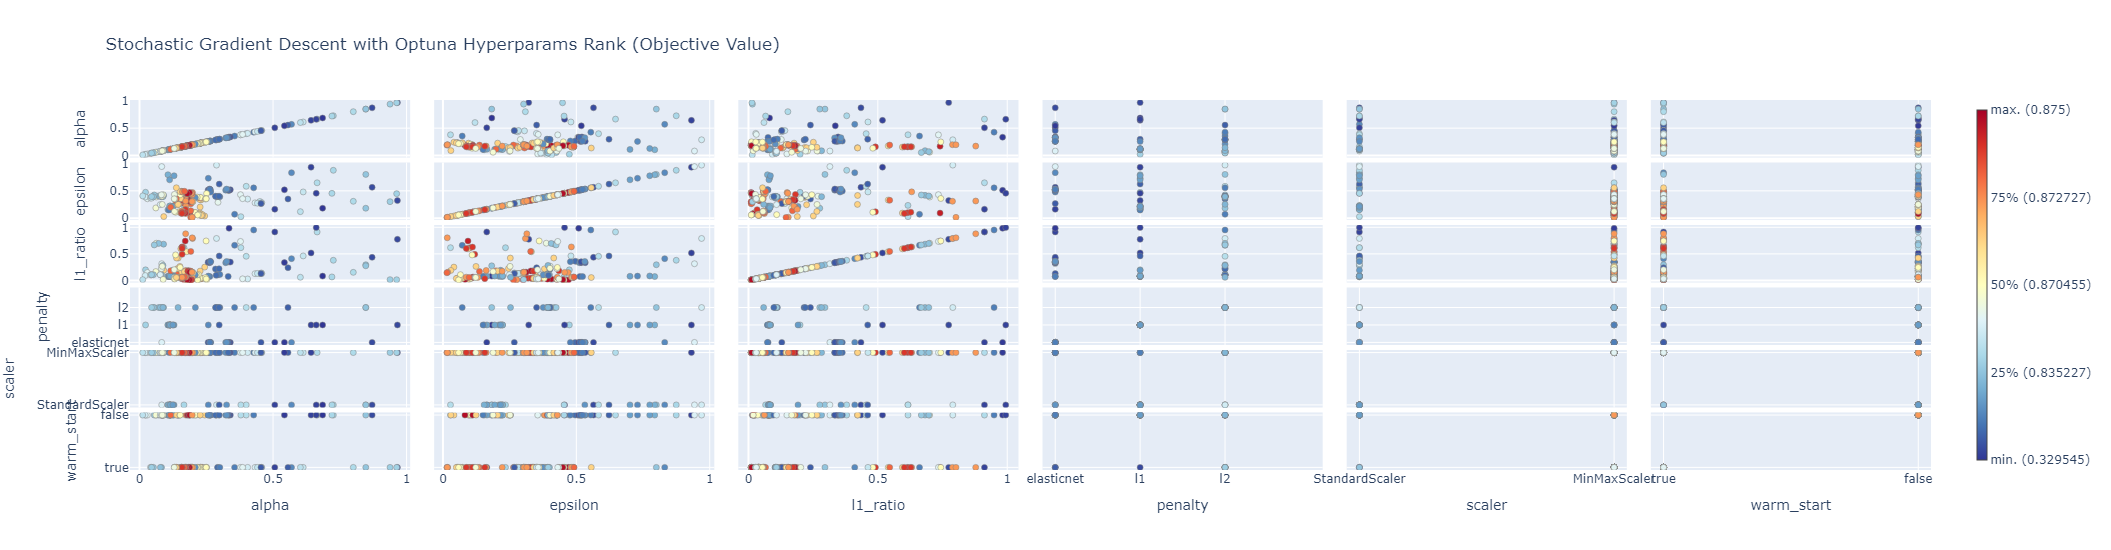

In [145]:
fig = plot_rank(study_sgd)
fig.update_layout(title="Stochastic Gradient Descent with Optuna Hyperparams Rank (Objective Value)", width=930, height=550)
fig.write_html('Graphs/SGD_optuna_performance3.html')
fig.show()

In [150]:
params = study_sgd.best_trial.params
params.pop('scaler')
params

{'alpha': 0.1790397690243783,
 'epsilon': 0.42771338006441595,
 'l1_ratio': 0.01685115928622183,
 'penalty': None,
 'warm_start': False}

In [151]:
sgd_optuna = SGDClassifier(**params, random_state=33).fit(X_train, y_train)
sgd_optuna.score(X_test, y_test)

0.9181818181818182

In [152]:
print(classification_report(y_test, sgd_optuna.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        82
           1       0.93      0.93      0.93        68
           2       0.91      0.96      0.93        70

    accuracy                           0.92       220
   macro avg       0.92      0.92      0.92       220
weighted avg       0.92      0.92      0.92       220



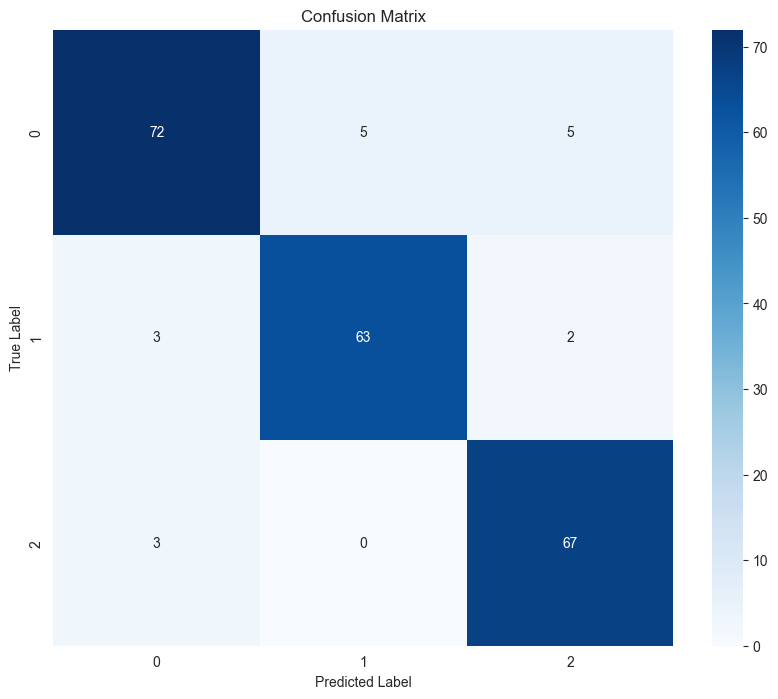

In [153]:
plt.figure(figsize=(10, 8))

cm = np.round(confusion_matrix(y_test, sgd_optuna.predict(X_test)), 0)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.savefig('Graphs/sgd_optuna_predictions.png')    
plt.show()

### Suport Vector Machine

In [55]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [56]:
svc.score(X_test, y_test)

0.9227272727272727

In [157]:
params = {
    'C': np.linspace(.001, 10, 20),
    'kernel': ['linear', 'poly', 'rbf'],
    'max_iter': [1000]
}

In [158]:
svc_grid_search = GridSearchCV(SVC(random_state=33), params, cv=5, n_jobs=-1)
svc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=33), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 5.27263158e-01, 1.05352632e+00, 1.57978947e+00,
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01]),
                         'kernel': ['linear', 'poly', 'rbf'],
                         'max_iter': [1000]})

In [159]:
svc_grid_search.score(X_test, y_test)

0.9227272727272727

### Decision Tree

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
dt.score(X_test, y_test)

0.9318181818181818

### AdaBoost

In [24]:
adab = AdaBoostClassifier()
adab.fit(X_train, y_train)

AdaBoostClassifier()

In [25]:
adab.score(X_test, y_test)

0.7727272727272727

### Extra Trees

In [26]:
etr = ExtraTreesClassifier()
etr.fit(X_train, y_train)

ExtraTreesClassifier()

In [27]:
etr.score(X_test, y_test)

0.9090909090909091

### Random Forest

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
rf.score(X_test, y_test)

0.8863636363636364

### Gradient Boosting

In [30]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [31]:
gb.score(X_test, y_test)

0.9090909090909091

### XGBoost

In [32]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [33]:
xgb.score(X_test, y_test)

0.9227272727272727

### LightGBM

In [34]:
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 880, number of used features: 19
[LightGBM] [Info] Start training from score -1.106599
[LightGBM] [Info] Start training from score -1.110041
[LightGBM] [Info] Start training from score -1.079478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

LGBMClassifier()

In [35]:
lgb.score(X_test, y_test)

0.9090909090909091

## 5. Nerual Network
---

In [89]:
def nn_predictions(model, X, y, string):
    predictions = np.argmax(model.predict(X), axis=1)
    
    plt.figure(figsize=(10, 8))

    cm = np.round(confusion_matrix(y, predictions), 0)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    plt.savefig('Graphs/' + string + '.png')    
    plt.show()

def nn_accuracy(model, X, y):
    predictions = np.argmax(model.predict(X), axis=1)
    print('Total accuracy score: ' + str(round(accuracy_score(y, predictions), 5) * 100) + '%')

def nn_evaluate(model, X, y):
    model.evaluate(X, tf.one_hot(y, depth=3))

def classification_reporting(X, y):
    print(classification_report(y, np.argmax(model.predict(X), axis=1)))

def nn_training_performance(history):
    plt.figure(figsize=(16, 10))

    for metric in history.history.keys():
        sns.lineplot(history.history[metric], label=metric)
    
    legend = plt.legend(title='Metrics', loc='center right', prop={'size': 17})
    legend.get_title().set_fontsize('17')
    plt.title('Training Performance', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=12)

    plt.savefig('Graphs/nn_performance.png')
    plt.show()

In [37]:
X = student_stress.iloc[:, :-1].drop('blood_pressure', axis=1)
y = student_stress['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33, shuffle=True)

In [38]:
tf.random.set_seed(33)
normalizer = tf.keras.layers.Normalization(axis=-1)  # axis=-1 normalizes features (last axis)
normalizer.adapt(np.array(X_train))

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(3, activation='tanh'),
    tf.keras.layers.Dense(5, activation='tanh'), 
    # tf.keras.layers.Dense(5, activation='tanh'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adamax(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train,
                    tf.one_hot(y_train, depth=y_train.nunique()),
                    epochs=150,
                    batch_size=33,
                    validation_data=(X_val, tf.one_hot(y_val, depth=3))
                   )


Epoch 1/150


24/24 [==============================] - 1s 6ms/step - loss: 1.3832 - accuracy: 0.1883 - val_loss: 1.2443 - val_accuracy: 0.2364
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 1.2122 - accuracy: 0.2532 - val_loss: 1.0986 - val_accuracy: 0.3939
Epoch 3/150
24/24 [==============================] - 0s 1ms/step - loss: 1.0917 - accuracy: 0.4078 - val_loss: 1.0013 - val_accuracy: 0.5152
Epoch 4/150
24/24 [==============================] - 0s 1ms/step - loss: 1.0090 - accuracy: 0.5065 - val_loss: 0.9344 - val_accuracy: 0.5758
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 0.9504 - accuracy: 0.6182 - val_loss: 0.8837 - val_accuracy: 0.7030
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 0.9054 - accuracy: 0.7065 - val_loss: 0.8451 - val_accuracy: 0.7576
Epoch 7/150
24/24 [==============================] - 0s 1ms/step - loss: 0.8709 - accuracy: 0.7338 - val_loss: 0.8146 - val_accuracy: 0.7758
Epoch 8/15

In [39]:
nn_evaluate(model, X_test, y_test)

6/6 [==============================] - 0s 1000us/step - loss: 0.2372 - accuracy: 0.9273


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 19)                39        
 on)                                                             
                                                                 
 dense (Dense)               (None, 3)                 60        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 137 (552.00 Byte)
Trainable params: 98 (392.00 Byte)
Non-trainable params: 39 (160.00 Byte)
_________________________________________________________________


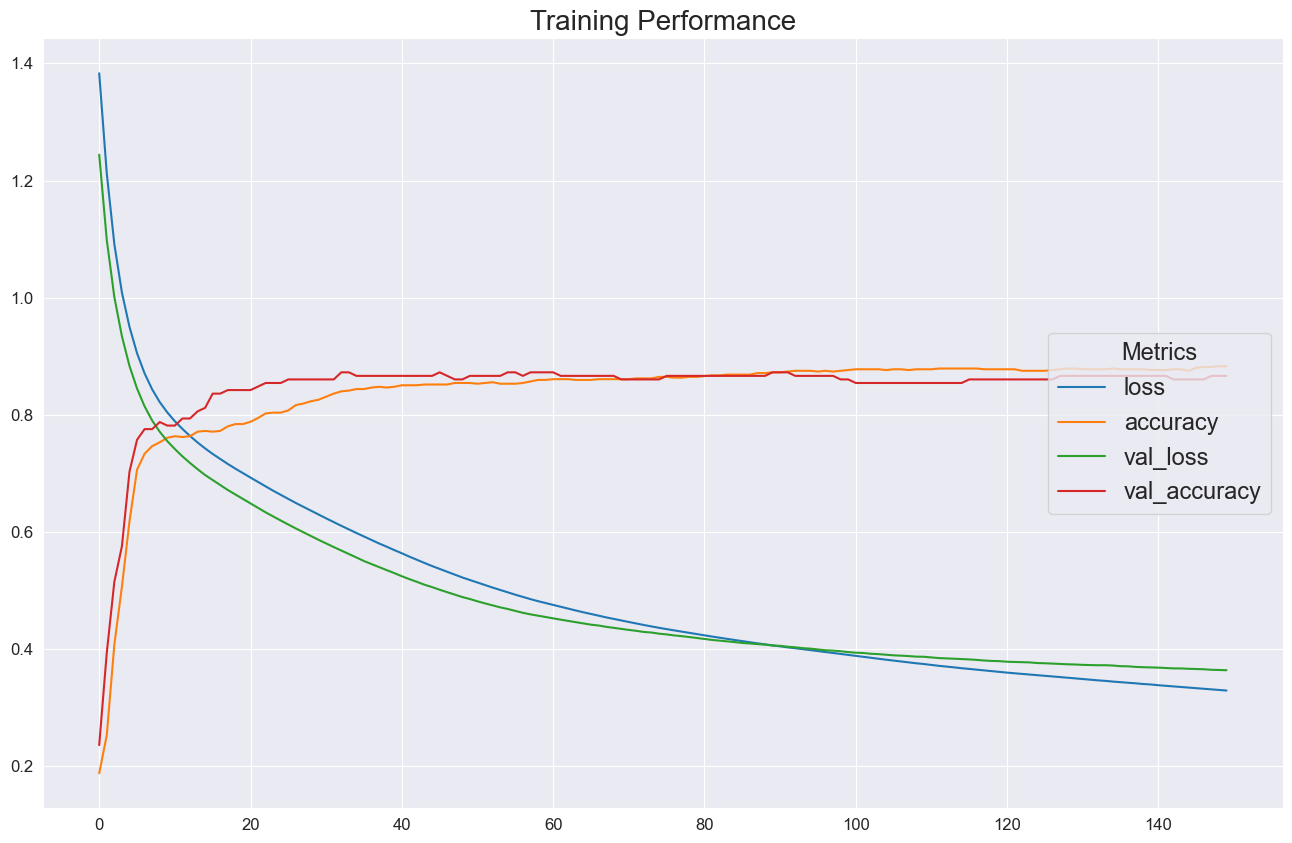

In [41]:
nn_training_performance(history)

In [42]:
classification_reporting(X_test, y_test)

6/6 [==============================] - 0s 903us/step
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        72
           1       0.93      0.91      0.92        44
           2       0.92      0.96      0.94        49

    accuracy                           0.93       165
   macro avg       0.93      0.93      0.93       165
weighted avg       0.93      0.93      0.93       165



6/6 [==============================] - 0s 800us/step


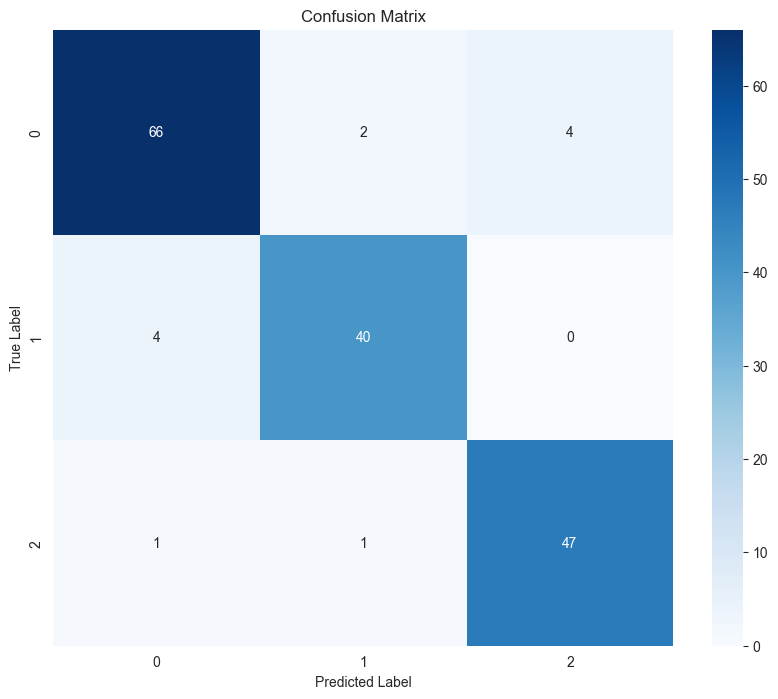

In [43]:
nn_predictions(model, X_test, y_test, 'nn_predictions')